# __*Quant Neurobio Final Project*__
- Modelling synaptic pruning during development

Based on work from [Chechik et al., 1998.](https://www-mitpressjournals-org.proxy.lib.duke.edu/doi/pdf/10.1162/089976698300017124)

and [Chechik et al., 1999](https://chechiklab.biu.ac.il/~gal/Papers/chechik_nr_del.pdf)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Synaptic Deletion strategies
- All depend on some arbitrary threshold (t)
- Where z is the total strength of the synaptic connection

#### _Minimal Value Deletion_

In [80]:
def min_val_deletion(z, thresh):
    for i in range(len(z)):
        if np.abs(z[i]) > t:
            z[i] = z[i]
        elif z[i] == t:
            z[i] = 0
        else:
            z[i] = 0
        
    return z

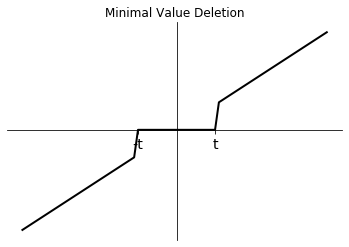

In [81]:
fig = plt.figure()


z = np.arange(-40, 40, 1)
t = 10

min_val_deletion(z, t)


x = np.arange(-40, 40, 1)
y = z

ax = plt.gca()
plt.title('Minimal Value Deletion')
ax.plot(x, y, linewidth = 2, color = 'black')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xticks(ticks = [-t, t], labels = ['-t', 't'], fontsize = 'x-large')
plt.yticks(ticks = []);

#### _Clipping Modification_

In [82]:
def clipping_mod(z, thresh):
    for i in range(len(z)):
        if z[i] > t:
            z[i] = 1
        elif z[i] < -t:
            z[i] = -1
        else:
            z[i] = 0
    return z

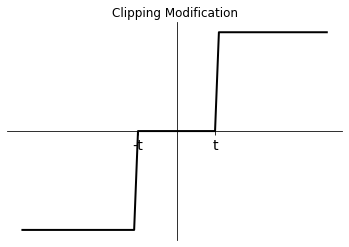

In [83]:
fig = plt.figure()


z = np.arange(-40, 40, 1)
t = 10

clipping_mod(z, t)

x = np.arange(-40, 40, 1)
y = z

ax = plt.gca()
plt.title('Clipping Modification')
ax.plot(x, y, linewidth = 2, color = 'black')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xticks(ticks = [-t, t], labels = ['-t', 't'], fontsize = 'x-large')
plt.yticks(ticks = []);

#### _Compressed Deletion_

In [84]:
def compressed_deletion(z, thresh):
    for i in range(len(z)):
        if np.abs(z[i]) <= t:
            z[i] = 0
        elif z[i] > t:
            z[i] = z[i] - t
        elif z[i] < -t:
            z[i] = z[i] + t
    return z

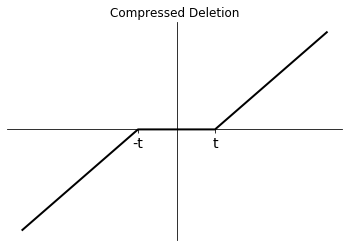

In [85]:
fig = plt.figure()


z = np.arange(-40, 40, 1)
t = 10

compressed_deletion(z,t)

x = np.arange(-40, 40, 1)
y = z

ax = plt.gca()
plt.title('Compressed Deletion')
ax.plot(x, y, linewidth = 2, color = 'black')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xticks(ticks = [-t, t], labels = ['-t', 't'], fontsize = 'x-large')
plt.yticks(ticks = []);

## _Creating a hebbian network to test the different deletion types_

### [Canonical Hopfield Model](https://www.pnas.org/content/79/8/2554)

In [272]:
def hopfield_model_synaptic_deletion(mem, neu, tim = 2, deletion_type = 'min_val', threshold = .5):

    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        for i in range(N):
            for j in range(N):
                connectivity[i][j] = connectivity[i][j] + (patterns[m][i] * patterns[m][j])
                connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ## min val deletion
    if deletion_type == 'min_val':
        for i in range(len(z[i])):
            for j in range(len(z[j])):
                if np.abs(z[i][j]) > t:
                    z[i][j] = z[i][j]
                elif z[i][j] == t:
                    z[i][j] = 0
                else:
                    z[i][j] = 0
    ##compressed deletion
    if deletion_type == 'compressed':
        for i in range(len(z[i])):
            for j in range(len(z[j])):
                if np.abs(z[i]) <= t:
                    z[i][j] = 0
                elif z[i][j] > t:
                    z[i][j] = z[i][j] - t
                elif z[i][j] < -t:
                    z[i][j] = z[i][j] + t
    ##clipping modification/deletion
    if deletion_type == 'clipping':
        for i in range(len(z[i])):
            for j in range(len(z[j])):
                if z[i][j] > t:
                    z[i][j] = 1
                elif z[i][j] < -t:
                    z[i][j] = -1
                else:
                    z[i][j] = 0
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]

    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
    return(m_overlap.take(0, axis = 1)[1])

In [324]:
%%time

x = np.ones(shape = (del_levels))
memory = np.ones(shape = (del_levels)) * 3
del_levels = 25

for i in range(del_levels):
    while x[i] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion(mem = int(memory[i]), neu = 200-i, tim = 2, deletion_type = 'min_val', threshold = .5)

Wall time: 8min 44s


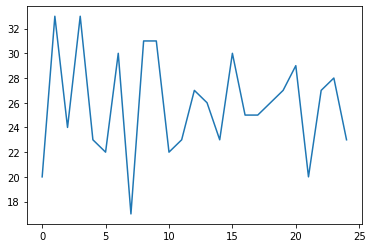

In [326]:
plt.plot(memory);

In [ ]:
binned_counts = []
c = 0
for i in range(91):
    d = c + 4
    x = np.mean(arr[c:d])
    binned_counts = np.append(binned_counts, x)
    c = d